In [207]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

In [208]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

# Start of DNN building

We will first create a DNN model on the easy dataset, analyse the results, and then create the DNN model on the hard dataset

## Easy Dataset (Distinct Job Categories)

In [209]:
is_working_with_easy_dataset = True

In [210]:
if is_working_with_easy_dataset:
    input_train_filename = "bag_easy_train.csv"
    input_test_filename = "bag_easy_test.csv"
else:
    input_train_filename = "bag_difficult_train.csv"
    input_test_filename = "bag_difficult_test.csv"

In [211]:
jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [212]:
jd_train

,category,client,Human,customer,software,Work,process,other,Management,sale,...,account,EA,quality,role,matter,development,Strong,marketing,resume,data
0,software+engineer,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,3,0,0,0,1
1,arts,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,hr,0,0,0,0,4,1,1,0,0,...,0,0,0,0,1,0,0,0,0,7
3,arts,1,0,0,0,1,0,2,0,0,...,0,2,0,0,0,0,0,1,1,0
4,arts,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,software+engineer,0,0,0,9,0,1,0,0,0,...,0,0,0,0,0,4,0,0,0,1
3178,sales,0,0,3,0,0,1,0,0,6,...,0,0,0,0,0,0,0,0,0,0
3179,arts,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3180,hr,4,0,0,2,3,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0


In [213]:
jd_test

,category,client,Human,customer,software,Work,process,other,Management,sale,...,account,EA,quality,role,matter,development,Strong,marketing,resume,data
0,software+engineer,0,0,0,0,6,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sales,0,0,0,0,1,1,0,0,0,...,5,0,0,0,1,0,2,0,0,2
2,sales,0,0,11,0,1,4,1,0,2,...,0,0,0,0,0,0,1,3,0,0
3,sales,3,0,0,0,0,0,1,0,2,...,1,2,0,0,0,0,0,1,0,0
4,arts,0,0,0,0,1,1,2,0,0,...,0,1,0,0,1,0,3,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,software+engineer,0,0,3,4,0,0,2,0,0,...,0,0,0,0,0,6,0,0,0,0
792,software+engineer,2,0,0,5,0,0,1,0,0,...,1,0,1,0,0,3,0,0,0,1
793,software+engineer,0,0,0,0,1,3,4,1,0,...,0,0,0,0,0,0,0,0,0,4
794,hr,4,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,2


### Splitting Dataset into Features and Target Vectors

In [214]:
jd_train_X = jd_train.iloc[:, 1:]
jd_train_y = jd_train[["category"]]

jd_test_X = jd_test.iloc[:, 1:]
jd_test_y = jd_test[["category"]]

In [215]:
jd_test_y.value_counts()

category         
software+engineer    220
arts                 198
sales                197
hr                   181
dtype: int64

### Encoding Target Variables

In [216]:
enc = OneHotEncoder(sparse=False)
enc.fit(jd_train_y);

In [217]:
enc.categories_

[array(['arts', 'hr', 'sales', 'software+engineer'], dtype=object)]

In [218]:
jd_train_y = enc.transform(jd_train_y)
jd_test_y = enc.transform(jd_test_y)

### DNN Model creation and training

In [219]:
# DNN Model with 2 hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [220]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [221]:
history = model.fit(jd_train_X, jd_train_y, epochs=50, validation_steps=30, validation_data=(jd_test_X, jd_test_y))

Epoch 1/50
  1/100 [..............................] - ETA: 43s - loss: 4.2364 - accuracy: 0.3125 - recall_8: 0.3125 - precision_8: 0.3333

2023-03-31 16:02:41.013673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 4.1351 - accuracy: 0.2863 - recall_8: 0.2143 - precision_8: 0.2784

2023-03-31 16:02:42.305576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 2s 15ms/step - loss: 4.1351 - accuracy: 0.2863 - recall_8: 0.2143 - precision_8: 0.2784 - val_loss: 4.0406 - val_accuracy: 0.3291 - val_recall_8: 0.3254 - val_precision_8: 0.3533
Epoch 2/50
100/100 [==============================] - 1s 12ms/step - loss: 2.0039 - accuracy: 0.3275 - recall_8: 0.1763 - precision_8: 0.3469 - val_loss: 2.6316 - val_accuracy: 0.3857 - val_recall_8: 0.3241 - val_precision_8: 0.4223
Epoch 3/50
100/100 [==============================] - 1s 12ms/step - loss: 1.3732 - accuracy: 0.4079 - recall_8: 0.2058 - precision_8: 0.4925 - val_loss: 2.0554 - val_accuracy: 0.4183 - val_recall_8: 0.3342 - val_precision_8: 0.4725
Epoch 4/50
100/100 [==============================] - 1s 12ms/step - loss: 1.0930 - accuracy: 0.5396 - recall_8: 0.2737 - precision_8: 0.6731 - val_loss: 1.6471 - val_accuracy: 0.4611 - val_recall_8: 0.3467 - val_precision_8: 0.5520
Epoch 5/50
100/100 [==============================] - 1s 12ms/step - loss: 0.92

### Viewing learning curves

(0.0, 4.334321761876344)

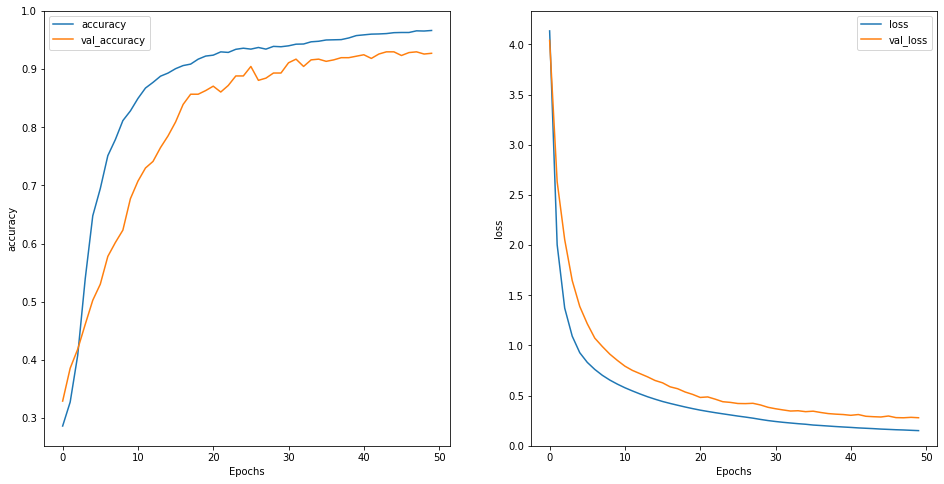

In [222]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

### Saving the model

In [223]:
model.save("tf_models/dnn_easy.h5")

## Hard Dataset (Distinct Job Categories)

In [224]:
is_working_with_easy_dataset = False

In [225]:
if is_working_with_easy_dataset:
    input_train_filename = "bag_easy_train.csv"
    input_test_filename = "bag_easy_test.csv"
else:
    input_train_filename = "bag_difficult_train.csv"
    input_test_filename = "bag_difficult_test.csv"

In [226]:
jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [227]:
jd_train

,category,assessment,Management,Work,cyber,ÊÊ,Data,control,design,Experience,...,Technology,role,Java,process,Strong,skill,software,business,Ability,experience
0,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.143276,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.345453,0.000000,0.0,0.323940
1,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.061751,0.0,...,0.0,0.082574,0.0,0.000000,0.0,0.057996,0.000000,0.125683,0.0,0.511923
2,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.290684,0.499494,0.0,...,0.0,0.000000,0.0,0.203606,0.0,0.000000,0.100361,0.000000,0.0,0.062741
3,ui+ux,0.120286,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.160089,0.0,0.073200,0.0,0.112439,0.000000,0.000000,0.0,0.225563
4,ui+ux,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.115759,0.0,0.105860,0.0,0.040652,0.000000,0.000000,0.0,0.097861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.095572,0.054742,0.0,...,0.0,0.109803,0.0,0.066942,0.0,0.179947,0.164985,0.111417,0.0,0.123768
3176,cyber+security,0.000000,0.0,0.0,0.140165,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.210418,0.0,0.000000,0.0,0.221681,0.094849,0.000000,0.0,0.177885
3177,ui+ux,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.422655,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.509533,0.107530,0.0,0.238901
3178,data+analyst,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.026570,0.0,...,0.0,0.071060,0.0,0.064984,0.0,0.124773,0.032032,0.567827,0.0,0.060074


In [228]:
jd_test

,category,assessment,Management,Work,cyber,ÊÊ,Data,control,design,Experience,...,Technology,role,Java,process,Strong,skill,software,business,Ability,experience
0,data+analyst,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.248572,0.000000,0.523485,0.0,0.064633
1,cyber+security,0.0,0.0,0.0,0.175017,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.151252
2,software+engineer,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.102496,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.038436
3,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.147327,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.141651,0.044691,0.335602,0.0,0.110494
4,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.102945,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.148468,0.000000,0.000000,0.0,0.115812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,software+engineer,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.044197,0.0,...,0.0,0.059146,0.0,0.055503,0.0,0.000000,0.107255,0.000000,0.0,0.099442
791,cyber+security,0.0,0.0,0.0,0.000000,0.0,0.0,0.087995,0.050226,0.0,...,0.0,0.000000,0.0,0.126149,0.0,0.048291,0.000000,0.152549,0.0,0.113008
792,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.602373,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.231666,0.000000,0.000000,0.0,0.180710
793,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.388837,0.0,...,0.0,0.000000,0.0,0.162769,0.0,0.000000,0.314537,0.000000,0.0,0.194417


### Splitting Dataset into Features and Target Vectors

In [229]:
jd_train_X = jd_train.iloc[:, 1:]
jd_train_y = jd_train[["category"]]

jd_test_X = jd_test.iloc[:, 1:]
jd_test_y = jd_test[["category"]]

In [230]:
jd_test_y.value_counts()

category         
cyber+security       212
software+engineer    211
ui+ux                200
data+analyst         172
dtype: int64

### Encoding Target Variables

In [231]:
enc = OneHotEncoder(sparse=False)
enc.fit(jd_train_y);

In [232]:
enc.categories_

[array(['cyber+security', 'data+analyst', 'software+engineer', 'ui+ux'],
       dtype=object)]

In [233]:
jd_train_y = enc.transform(jd_train_y)
jd_test_y = enc.transform(jd_test_y)

### DNN Model creation and training

In [235]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [236]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [237]:
history = model.fit(jd_train_X, jd_train_y, epochs=50, validation_steps=30, validation_data=(jd_test_X, jd_test_y))

Epoch 1/50
  6/100 [>.............................] - ETA: 1s - loss: 1.3861 - accuracy: 0.3385 - recall_9: 0.0000e+00 - precision_9: 0.0000e+00 

2023-03-31 16:03:41.453738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.3755 - accuracy: 0.3358 - recall_9: 0.0000e+00 - precision_9: 0.0000e+00

2023-03-31 16:03:42.758771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 2s 15ms/step - loss: 1.3755 - accuracy: 0.3358 - recall_9: 0.0000e+00 - precision_9: 0.0000e+00 - val_loss: 1.3641 - val_accuracy: 0.3987 - val_recall_9: 0.0000e+00 - val_precision_9: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 1s 12ms/step - loss: 1.3514 - accuracy: 0.4195 - recall_9: 0.0000e+00 - precision_9: 0.0000e+00 - val_loss: 1.3392 - val_accuracy: 0.4616 - val_recall_9: 0.0000e+00 - val_precision_9: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 1s 12ms/step - loss: 1.3203 - accuracy: 0.5000 - recall_9: 0.0000e+00 - precision_9: 0.0000e+00 - val_loss: 1.3048 - val_accuracy: 0.5170 - val_recall_9: 0.0000e+00 - val_precision_9: 0.0000e+00
Epoch 4/50
100/100 [==============================] - 1s 12ms/step - loss: 1.2804 - accuracy: 0.5909 - recall_9: 0.0000e+00 - precision_9: 0.0000e+00 - val_loss: 1.2613 - val_accuracy: 0.6226 - val_recall_9: 0.0000e+00 - val_precision_9: 0.0000e+00
Epoch 5/50
100/

### Viewing learning curves

(0.0, 1.4306822806596755)

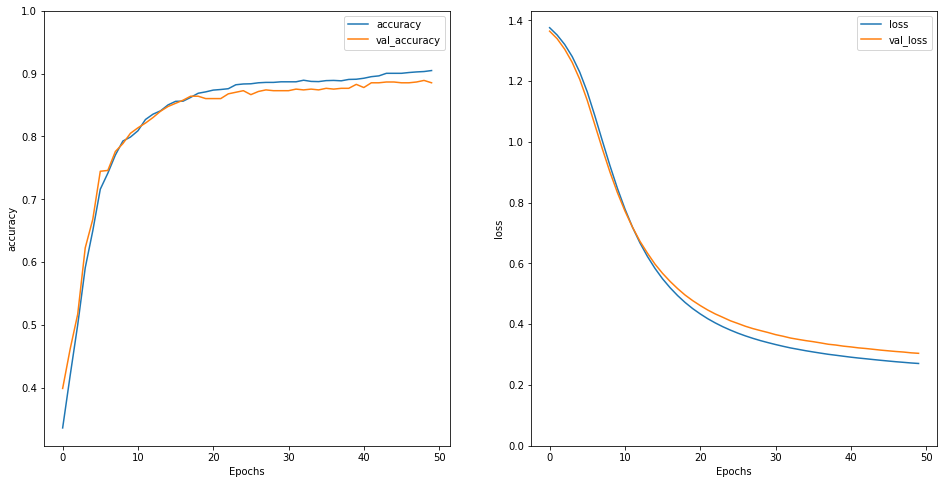

In [238]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

### Saving the model

In [239]:
model.save("tf_models/dnn_hard.h5")